<a href="https://colab.research.google.com/github/heidaralavi/Gas-Prj/blob/main/Gas_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# گندله سازی اردکان
بررسی میزان مصرف گاز با برخی پارامترهای مهم

ابتدا توابع مورد نیاز را ایمپورت می کنیم

In [238]:
!pip install xgboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest,RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import scale , normalize, minmax_scale,RobustScaler,MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import xgboost as xgb


دریافت داده های اولیه

In [2]:
url = 'https://raw.githubusercontent.com/heidaralavi/Gas-Prj/main/total.csv'
df=pd.read_csv(url)
#df=pd.read_csv('input-data.csv')
df.head()

,Unnamed: 0,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
0,0,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364.0
1,1,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304.0
2,2,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200.0
3,3,8.850536,2028.555556,66.986667,21.990000,23.583333,12277.02,5.978728,129.616905,114.068555,102.256167,825.551090,924.538606,21.236601,1.720821,1.590273,31.493056,177.220492,179.281210,203772.0
4,4,9.006061,2034.181818,67.096667,21.846667,19.883333,9942.13,4.718885,138.999936,115.877855,100.122762,724.071424,910.241250,18.896511,1.708230,1.278280,26.135069,163.096300,129.430960,200120.0


رسم ترند مصرف گاز

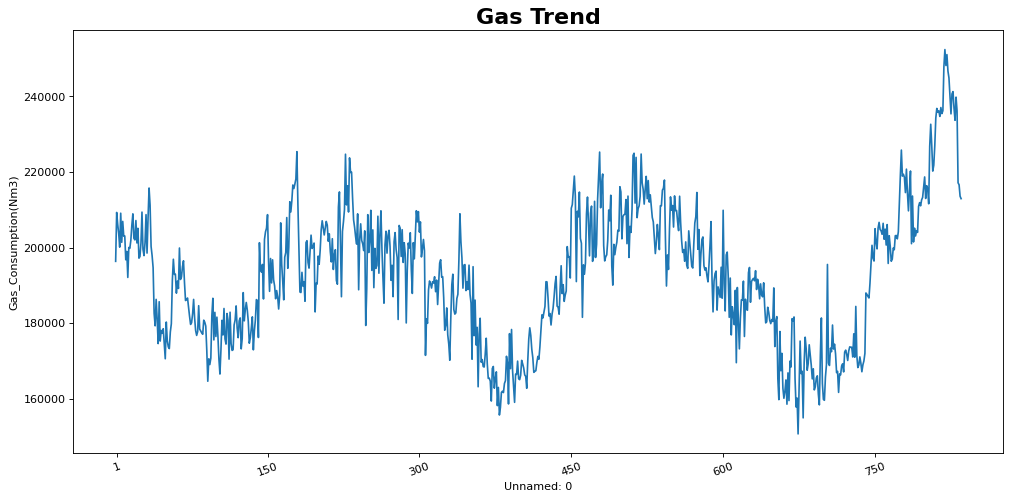

In [3]:
plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.iloc[:,0] , y=df.iloc[:,19], data=df )

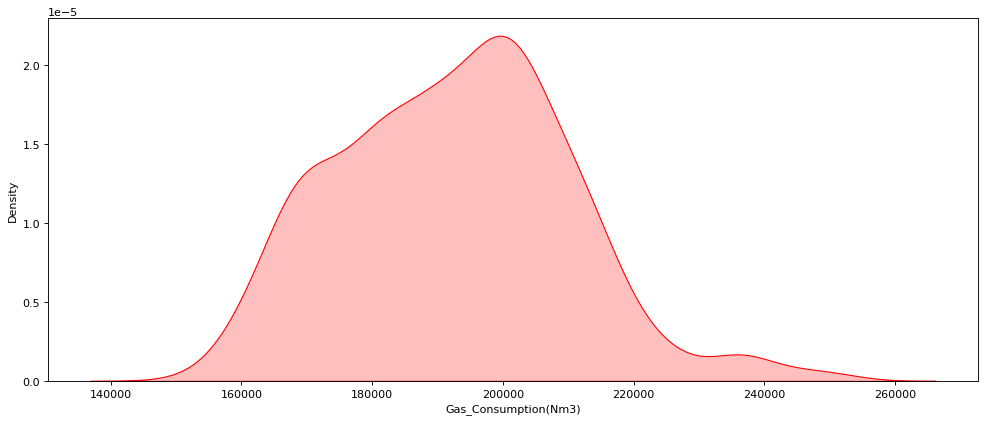

In [4]:
plt.figure(figsize=(15,6),dpi=80)
#plt.xticks(ticks=[0,190000,210000],rotation=0)
sns.kdeplot(df.iloc[:,19], shade=True , color='r')

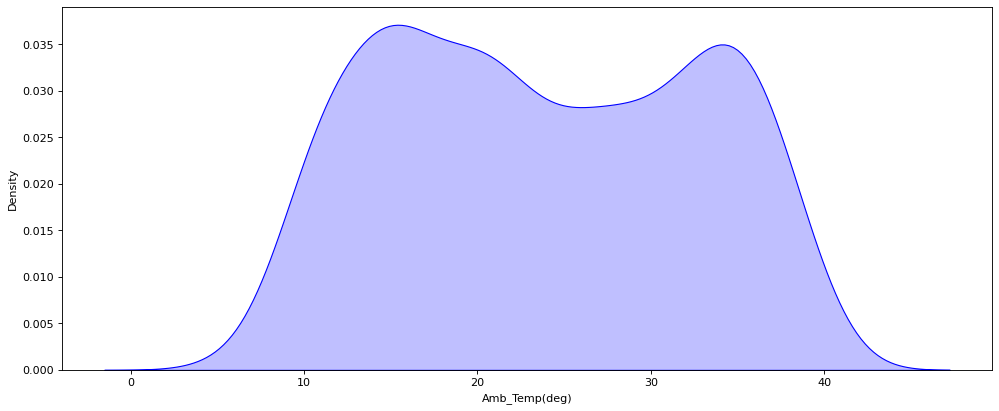

In [5]:
plt.figure(figsize=(15,6),dpi=80)
#plt.xticks(ticks=[0,190000,210000],rotation=0)
sns.kdeplot(df.iloc[:,13], shade=True , color='b')

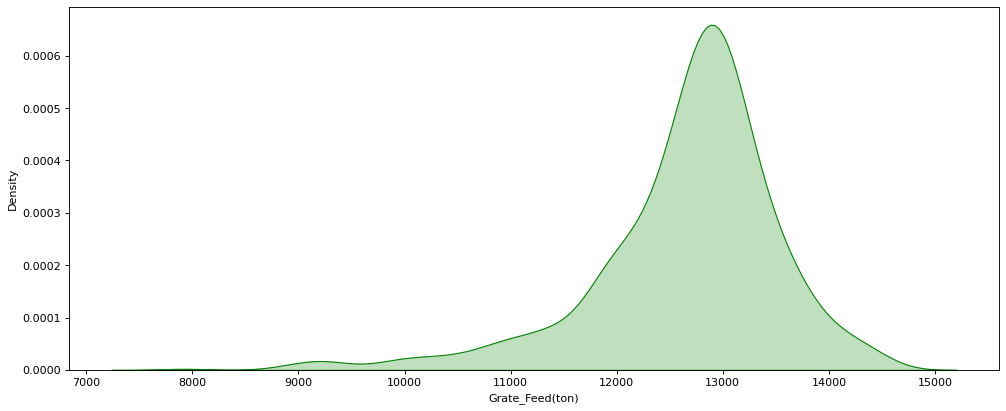

In [6]:
plt.figure(figsize=(15,6),dpi=80)
#plt.xticks(ticks=[0,190000,210000],rotation=0)
sns.kdeplot(df.iloc[:,6], shade=True , color='g')

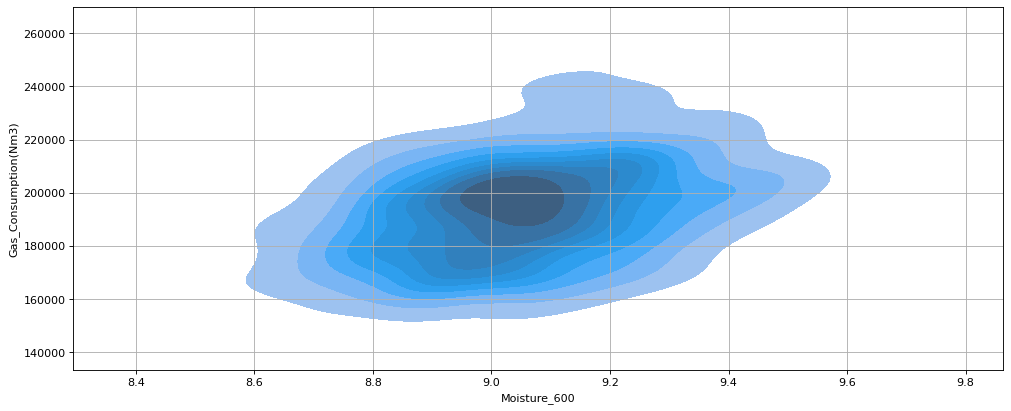

In [8]:
plt.figure(figsize=(15,6),dpi=80)
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,1] , y=df.iloc[:,19],fill=True, levels=10,)


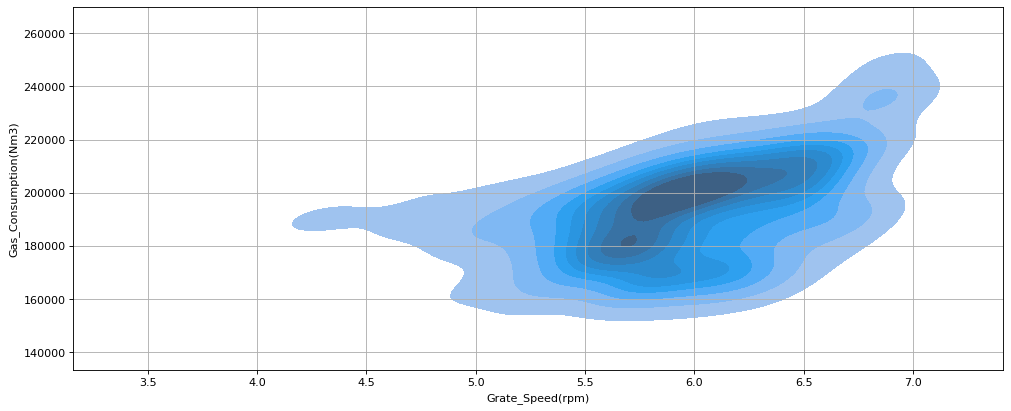

In [9]:
plt.figure(figsize=(15,6),dpi=80)
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,7] , y=df.iloc[:,19],fill=True, levels=10)

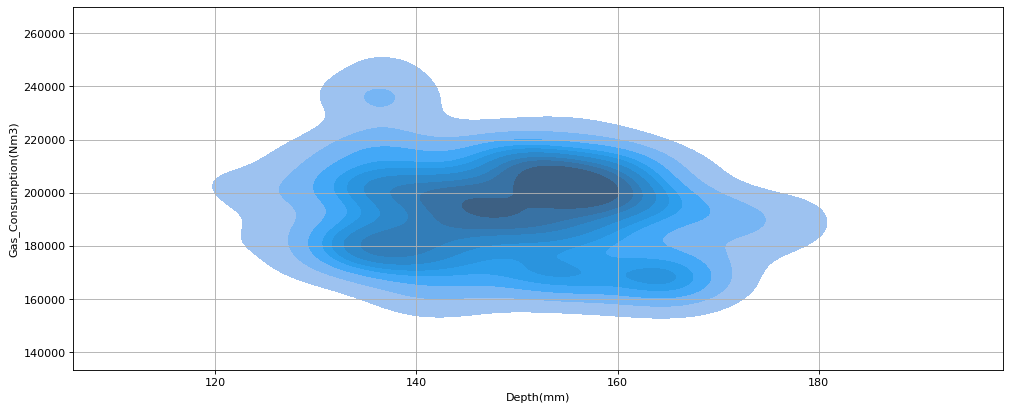

In [10]:
plt.figure(figsize=(15,6),dpi=80)
#plt.annotate('(5.7,180000)', xy=(5.7, 180000), xytext=(4.5, 220000),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=24)
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,8] , y=df.iloc[:,19],fill=True, levels=10)

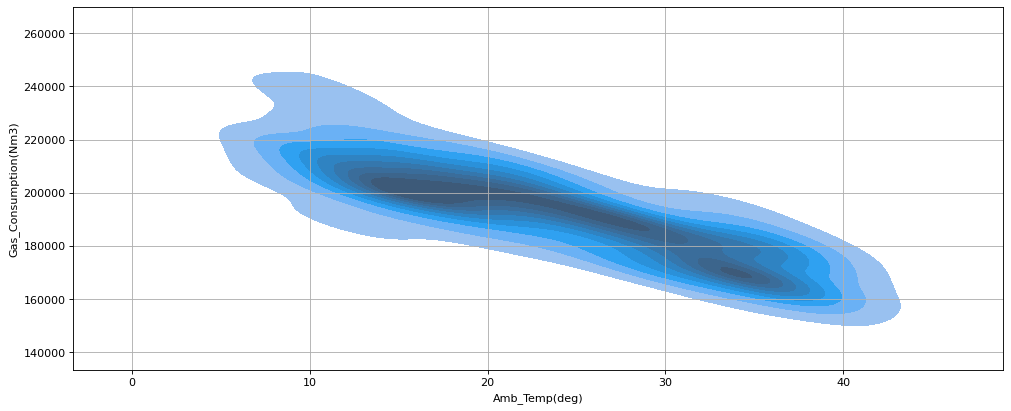

In [11]:
plt.figure(figsize=(15,6),dpi=80)
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,13] , y=df.iloc[:,19],fill=True, levels=10)

حذف ستون اول

In [12]:
df.drop(columns='Unnamed: 0',inplace=True)

In [13]:
df.describe()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,9.052266,1926.071715,67.282570,22.964537,23.625758,12655.640329,5.948912,149.016597,123.765266,104.307509,793.769003,1005.075986,23.734208,1.629633,1.645198,37.720407,183.975161,150.364463,192552.954545
std,0.186600,132.631126,0.446948,1.181879,0.970735,889.346375,0.501749,11.990398,12.739020,9.686540,45.191705,73.407282,8.916284,0.082400,0.135191,5.051669,11.840048,26.117672,17713.733711
min,8.476923,1547.444444,65.805000,19.260000,17.083333,7930.230000,3.649768,117.594789,99.933404,65.826530,533.176063,802.767262,5.423704,1.304804,1.031939,25.605556,130.982433,68.615551,150690.000000
25%,8.928460,1833.250000,66.965000,22.103750,23.850000,12328.217500,5.670246,138.924113,115.222634,99.924040,770.050406,974.911947,15.899637,1.550348,1.590278,34.958431,180.047803,133.282614,179582.000000
50%,9.048724,1916.716346,67.300000,22.980000,24.000000,12810.600000,5.958795,149.346148,120.657144,104.189964,798.533404,1027.676951,23.281548,1.655363,1.645841,36.514931,185.389751,151.303738,192960.000000
75%,9.184642,2012.777273,67.596667,23.851667,24.000000,13148.377500,6.296626,157.759849,129.946128,110.696750,828.786399,1055.059896,31.846996,1.699714,1.705973,37.794444,190.963960,168.032382,204332.500000
max,9.681429,2288.666667,68.330000,25.503333,24.000000,14510.030000,6.922985,186.652068,195.568567,127.353284,872.397282,1303.756288,40.288171,1.780731,1.944085,50.481944,199.896767,199.714990,252402.000000


نرمال سازی داده ها

In [14]:
col=df.columns
data=df.values

In [15]:
trans = MinMaxScaler()
normal_data = trans.fit_transform(data)

In [16]:
normal_df=pd.DataFrame(normal_data,columns=col)

In [17]:
normal_df.describe()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,0.477659,0.510815,0.585176,0.593359,0.945893,0.718169,0.702411,0.455011,0.249196,0.625435,0.768209,0.403819,0.525191,0.682519,0.672325,0.487002,0.768965,0.623564,0.411583
std,0.154918,0.178936,0.177009,0.189303,0.140347,0.135163,0.153289,0.173630,0.133204,0.157436,0.133222,0.146525,0.255741,0.173136,0.148212,0.203071,0.171808,0.199220,0.174156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.374873,0.385587,0.459406,0.455486,0.978313,0.668407,0.617276,0.308864,0.159870,0.554190,0.698289,0.343610,0.300476,0.515929,0.612116,0.375974,0.711976,0.493267,0.284057
50%,0.474719,0.498193,0.592079,0.595836,1.000000,0.741720,0.705430,0.459783,0.216696,0.623524,0.782255,0.448931,0.512208,0.736582,0.673031,0.438543,0.789492,0.630729,0.415585
75%,0.587560,0.627791,0.709571,0.735451,1.000000,0.793056,0.808641,0.581620,0.313825,0.729280,0.871438,0.503589,0.757886,0.829770,0.738953,0.489978,0.870378,0.758331,0.527396
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# بررسی اولیه داده ها

دیتاها را نسبت به هم ترسیم می کنیم تا دیدی کلی از داده ها بدست آوریم

ماتریس ضریب همبستگی دیتاها را محاسبه و ترسیم می کنیم

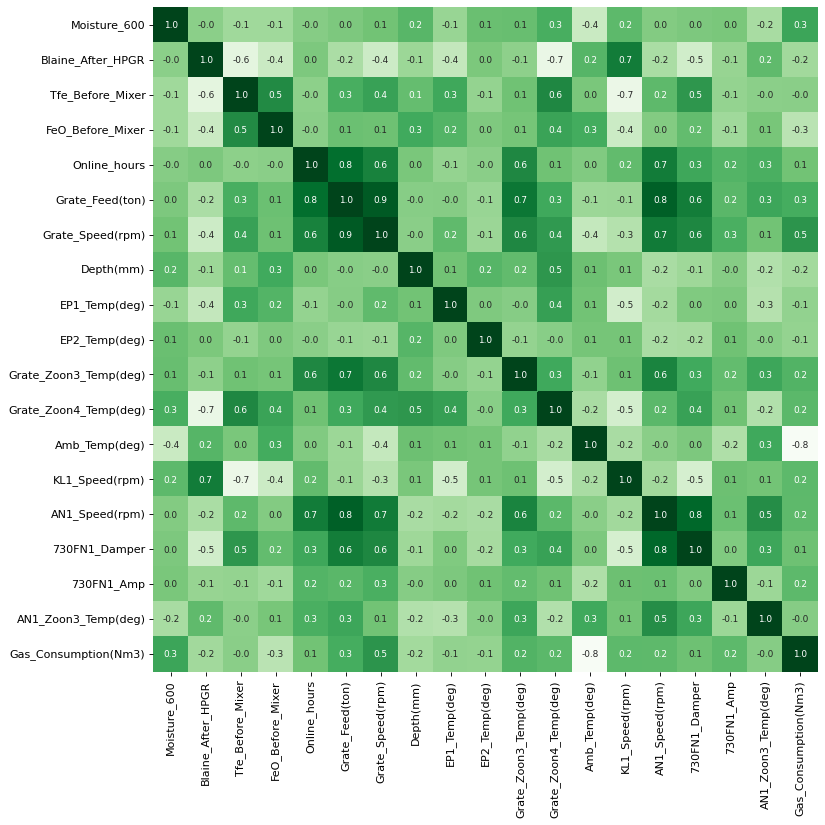

In [18]:
corr = normal_df.corr()
plt.figure(figsize=(15,11),dpi=80)
sns.heatmap(corr, cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

بررسی اهمیت پاارامترهای ورودی روی مصرف گاز

In [19]:
# split into input and output elements
X, y = normal_data[:, :-1], normal_data[:, -1]

In [22]:
model = DecisionTreeRegressor(random_state=123)
model = model.fit(X,y)

(-1.0, 18.0)

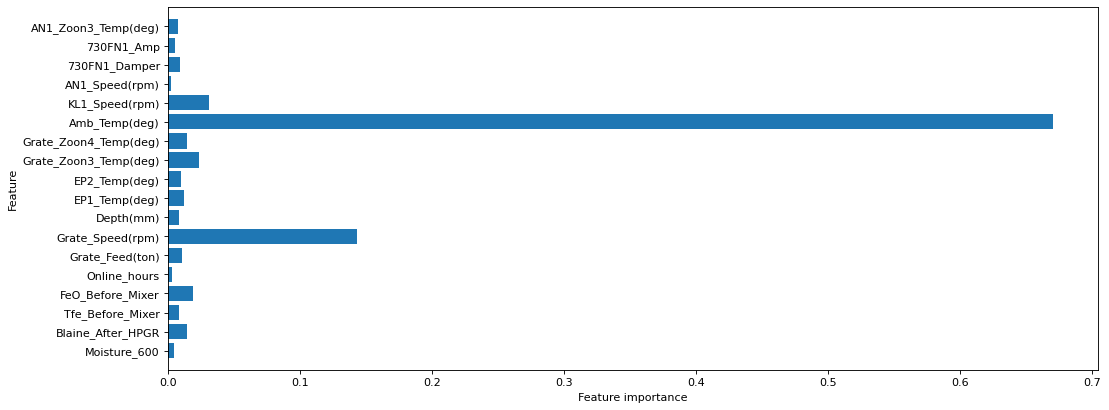

In [23]:
plt.figure(figsize=(15,6),dpi=80)
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

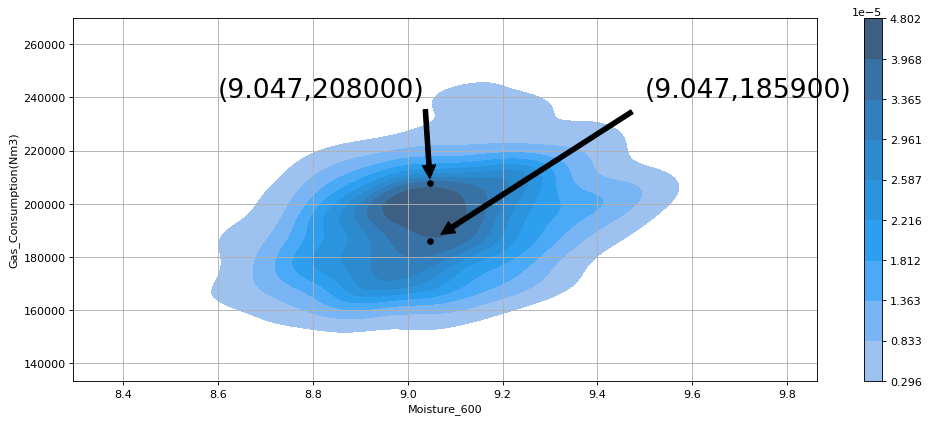

In [30]:
plt.figure(figsize=(15,6),dpi=80)
plt.grid()
plt.annotate('(9.047,185900)', xy=(9.047, 185900), xytext=(9.5, 240000),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=24)
plt.annotate('(9.047,208000)', xy=(9.047, 208000), xytext=(8.6, 240000),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=24)
plt.plot([9.047], [185900],marker=".",  markersize=10,color='black')
plt.plot([9.047], [208000],marker=".",  markersize=10,color='black') 
sns.kdeplot(data=df, x=df.iloc[:,0] , y=df.iloc[:,18],fill=True, levels=10,cbar=True)
#sns.scatterplot(data=df, x=df.iloc[:,0] , y=df.iloc[:,18],size=0.05)

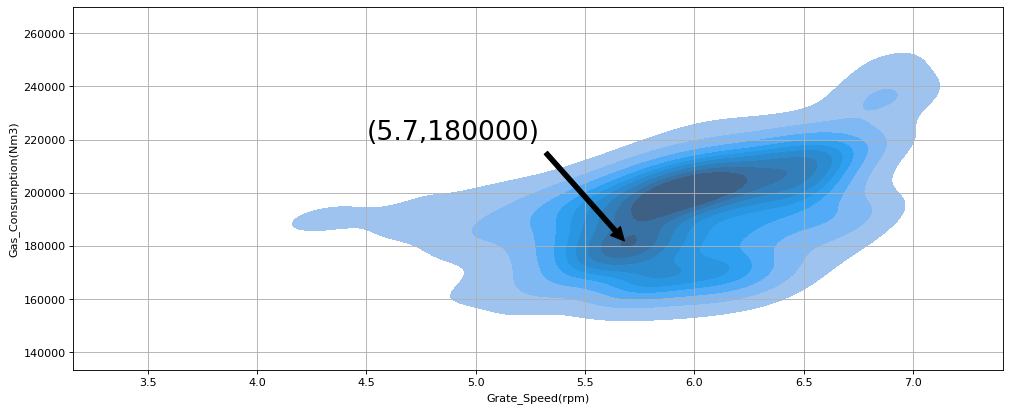

In [31]:
plt.figure(figsize=(15,6),dpi=80)
plt.annotate('(5.7,180000)', xy=(5.7, 180000), xytext=(4.5, 220000),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=24)
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,6] , y=df.iloc[:,18],fill=True, levels=10)

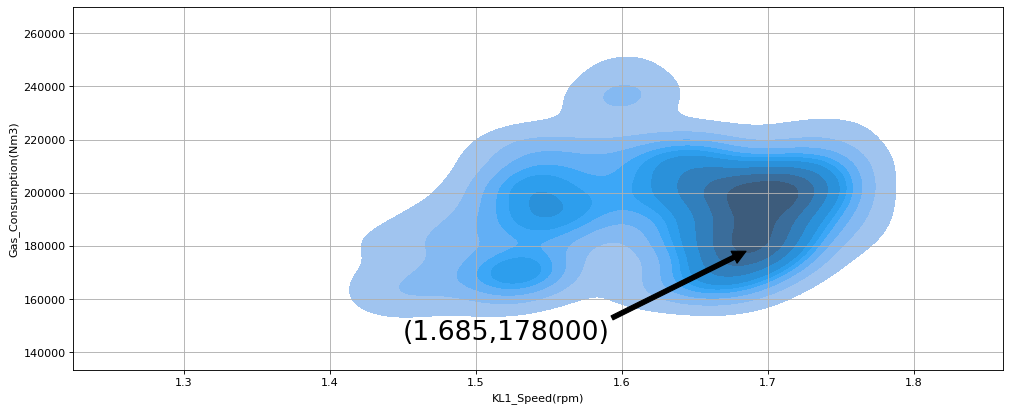

In [32]:
plt.figure(figsize=(15,6),dpi=80)
plt.annotate('(1.685,178000)', xy=(1.685, 178000), xytext=(1.45, 145000),arrowprops=dict(facecolor='black', shrink=0),fontsize=24)
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,13] , y=df.iloc[:,18],fill=True, levels=10)

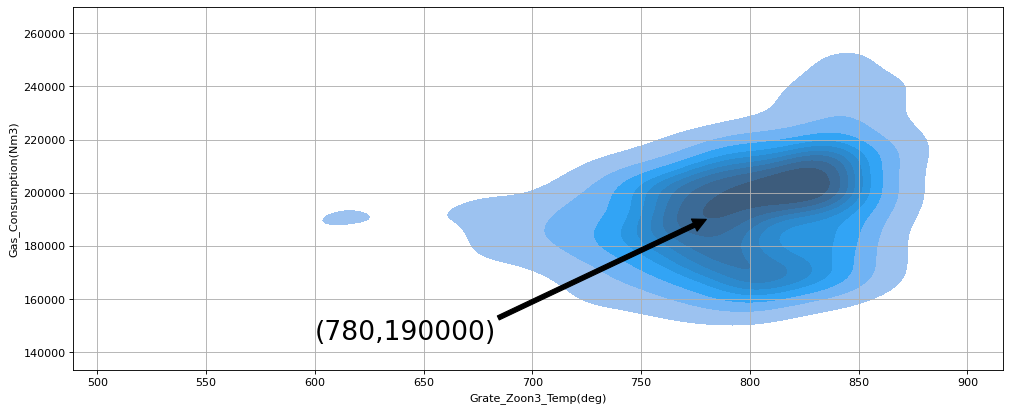

In [33]:
plt.figure(figsize=(15,6),dpi=80)
plt.annotate('(780,190000)', xy=(780, 190000), xytext=(600, 145000),arrowprops=dict(facecolor='black', shrink=0),fontsize=24)
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,10] , y=df.iloc[:,18],fill=True, levels=10)

In [34]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_test.shape,X_train.shape)

(251, 18) (585, 18)


In [35]:
model = DecisionTreeRegressor(random_state=123)
model = model.fit(X_train,y_train)

In [36]:
print("Accuracy on test: {:.2f} %".format(model.score(X_test, y_test)*100))

Accuracy on test: 82.34 %


In [37]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 82.34%
Mean Absolute Error 0.06
Mean Squared Error 0.01


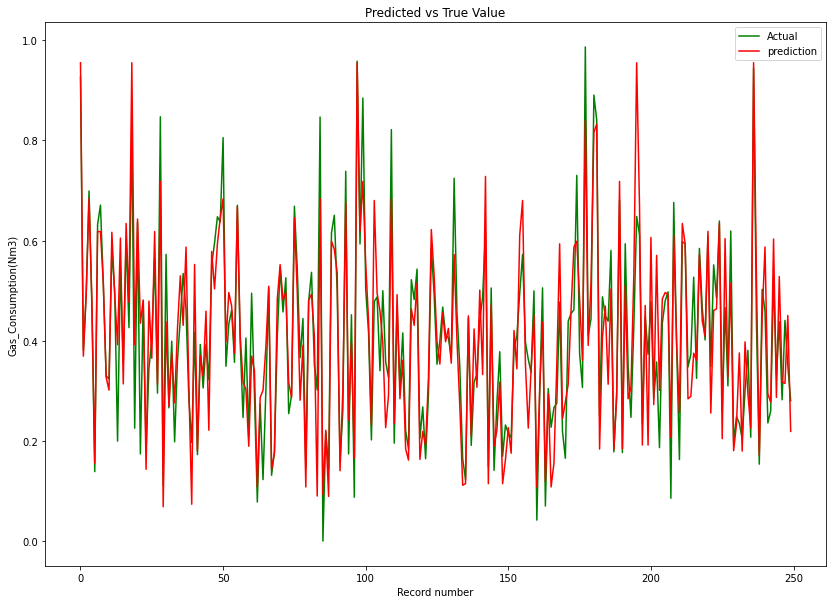

In [38]:
plt.figure(figsize=(14,10))
plt.plot(range(250),y_test[0:250], color = "green")
plt.plot(range(250),model.predict(X_test[0:250]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# استفاده از مدل رگرسیون خطی برای حل مسئله و حدس زدن جواب نمونه های آزمایشی

In [39]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

مدل چقدر خوب آموزش دیده است؟

In [268]:
ybar = model.predict(X_train)

In [269]:
# evaluate predictions
mae = mean_absolute_error(y_train, ybar)
print('MAE: %.3f' %mae)

MAE: 0.054


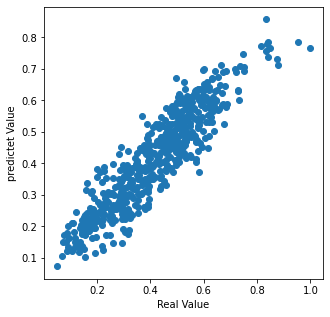

In [270]:
plt.scatter(y_train, ybar)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [271]:
print("The Train Score is ", (r2_score( y_train, ybar)))

The Train Score is  0.838559003734215


مدل چقدر خوب حدس می زند؟

In [272]:
# evaluate the model
yhat = model.predict(X_test)

In [273]:
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' %mae)

MAE: 0.055


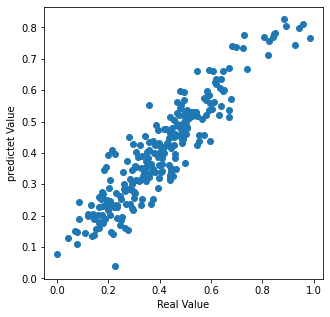

In [274]:
plt.scatter(y_test,yhat)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [275]:
print("The Predict Score is ", (r2_score( y_test,yhat)))


The Predict Score is  0.8534167700607902


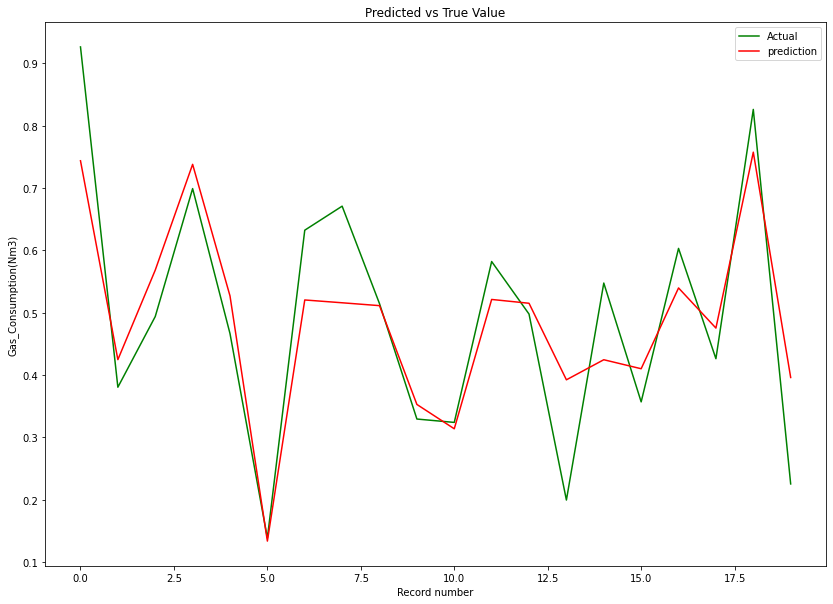

In [276]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# استفاده از شبکه عصبی برای حل مسئله و حدس زدن جواب نمونه های آزمایشی

In [277]:
model = MLPRegressor(hidden_layer_sizes=(100,),activation="relu" ,random_state=1, max_iter=200000)
model.fit(X_train, y_train)


MLPRegressor(max_iter=200000, random_state=1)

مدل چقدر خوب آموزش دیده است؟

In [278]:
ybar = model.predict(X_train)

In [279]:
# evaluate predictions
mae = mean_absolute_error(y_train, ybar)
print('MAE: %.3f' %mae)

MAE: 0.059


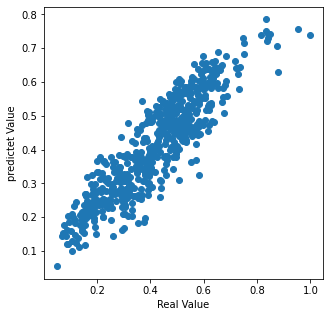

In [280]:
plt.scatter(y_train, ybar)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [281]:
print("The Train Score is ", (r2_score( y_train, ybar)))

The Train Score is  0.806412044508145


مدل چقدر خوب حدس می زند؟

In [282]:
# evaluate the model
yhat = model.predict(X_test)

In [283]:
print("The Train Score is: ", (r2_score( y_test,yhat)))

The Train Score is:  0.8229916538897999


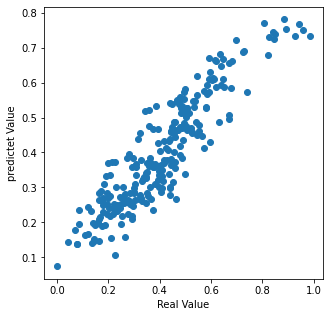

In [284]:
plt.scatter(y_test,yhat)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

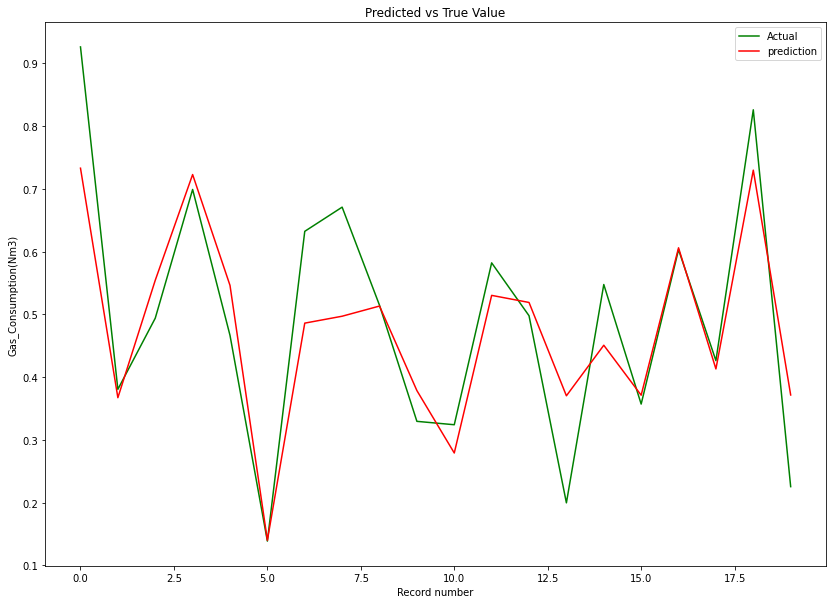

In [285]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# Decision Tree Regression

In [286]:
model = DecisionTreeRegressor(random_state=123)
model = model.fit(X_train,y_train)

In [287]:
print("Accuracy on test: {:.2f} %".format(model.score(X_test, y_test)*100))

Accuracy on test: 82.34 %


In [288]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 82.34%
Mean Absolute Error 0.06
Mean Squared Error 0.01


In [289]:
model.feature_importances_

array([0.0069255 , 0.02599671, 0.00675725, 0.01120561, 0.00229984,
       0.0059772 , 0.09900141, 0.0024398 , 0.00887233, 0.01048169,
       0.02082828, 0.03130899, 0.70614825, 0.00894117, 0.00353973,
       0.0200488 , 0.00654461, 0.02268283])

(-1.0, 18.0)

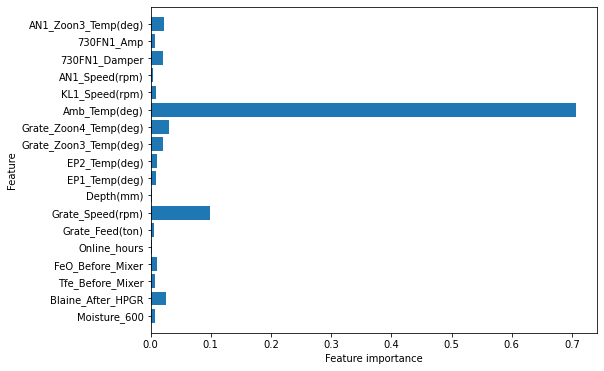

In [290]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

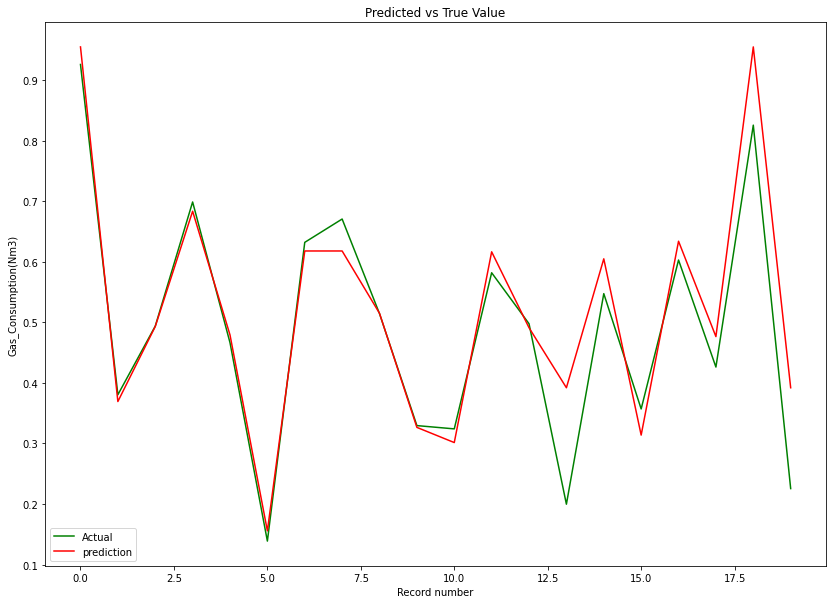

In [291]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# Support Vector Regression

In [292]:
model=SVR()
model.fit(X_train,y_train)

SVR()

In [293]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 89.01 %



In [294]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 89.01%
Mean Absolute Error 0.05
Mean Squared Error 0.00


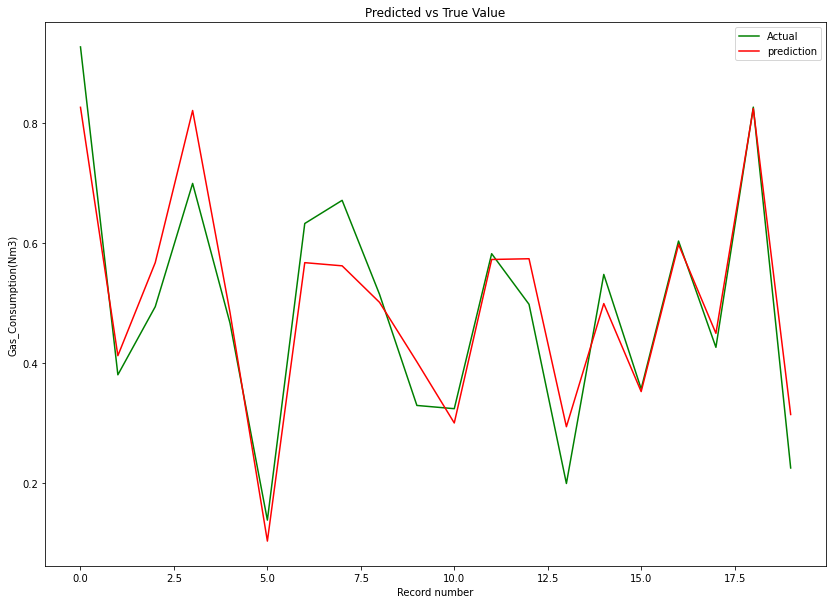

In [295]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# K-Nearest Neighbor Regressor

In [296]:
model=KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [297]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 89.55 %



In [298]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 89.55%
Mean Absolute Error 0.05
Mean Squared Error 0.00


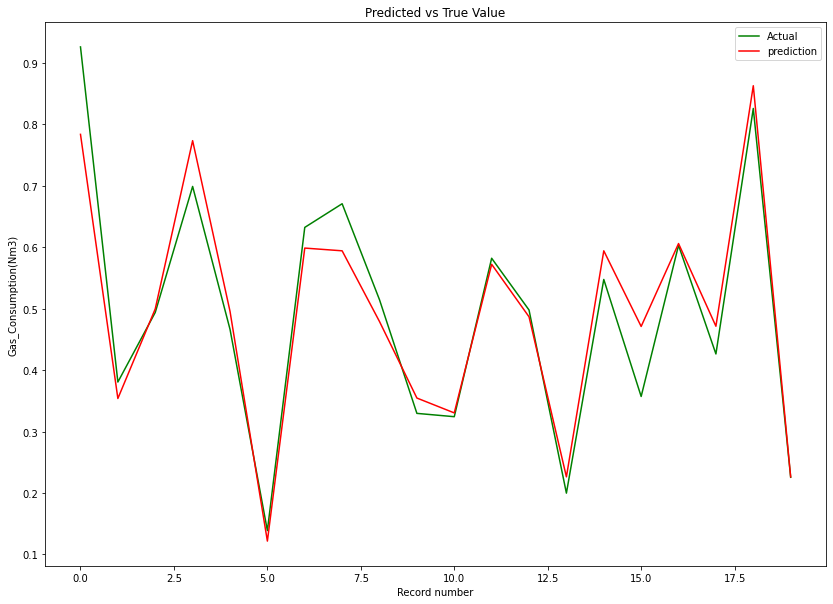

In [299]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# Random Forest Regressor

In [300]:
model = RandomForestRegressor(n_jobs = -1,random_state = 123)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=123)

In [301]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 89.86 %



In [302]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 89.86%
Mean Absolute Error 0.05
Mean Squared Error 0.00


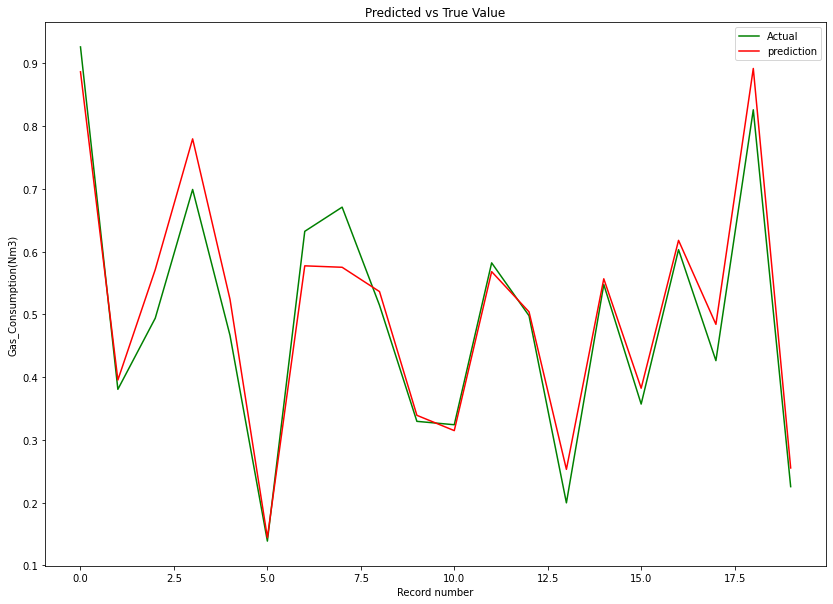

In [303]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

(-1.0, 18.0)

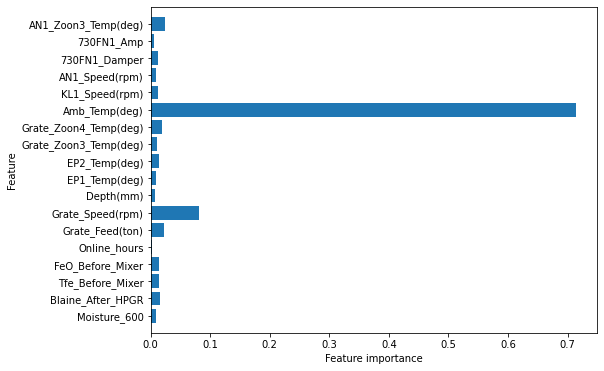

In [304]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# Gradient Boosting Regressor

In [305]:
model = GradientBoostingRegressor(random_state = 123)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=123)

In [306]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 90.03 %



In [307]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 90.03%
Mean Absolute Error 0.05
Mean Squared Error 0.00


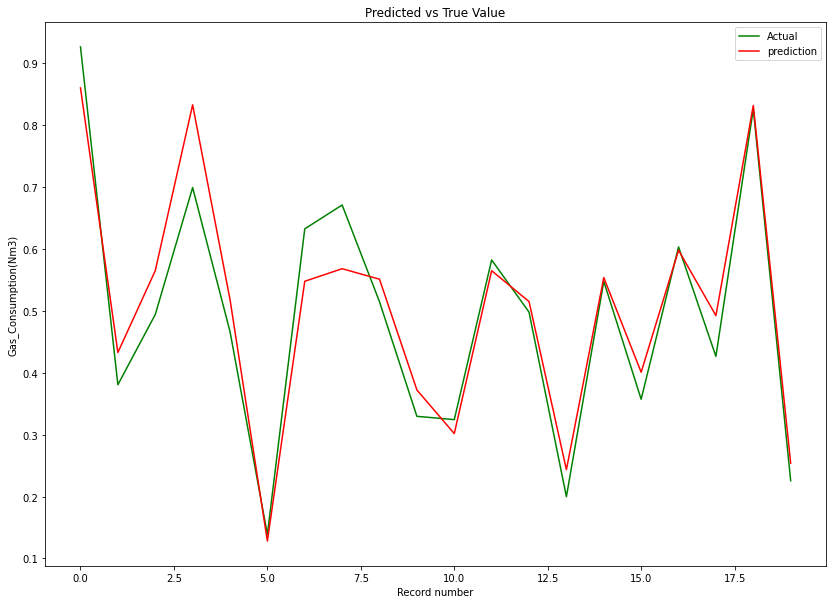

In [308]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

(-1.0, 18.0)

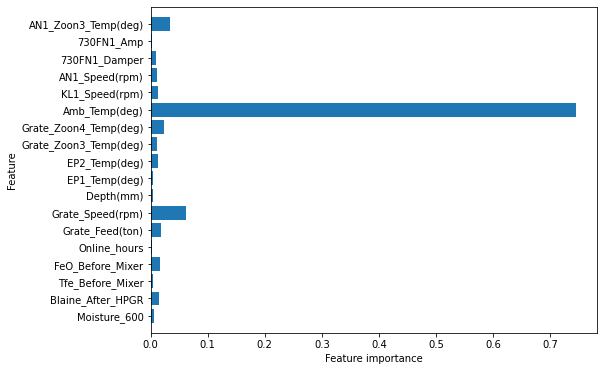

In [309]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# Extreme Gradient Boosting Regressor

In [310]:
model = XGBRegressor(random_state = 123,n_jobs=-1)
model.fit(X_train, y_train)

[16:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_jobs=-1, random_state=123)

In [311]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 90.18 %



In [312]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 90.18%
Mean Absolute Error 0.05
Mean Squared Error 0.00


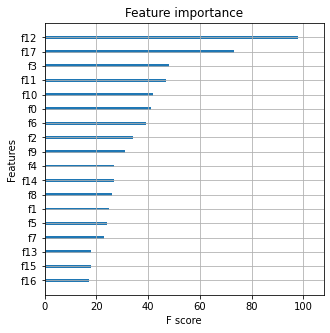

In [313]:
xgb.plot_importance(model,importance_type="weight",show_values=False)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

(-1.0, 18.0)

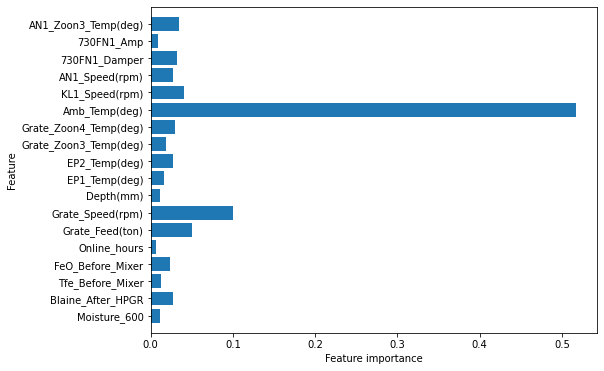

In [314]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

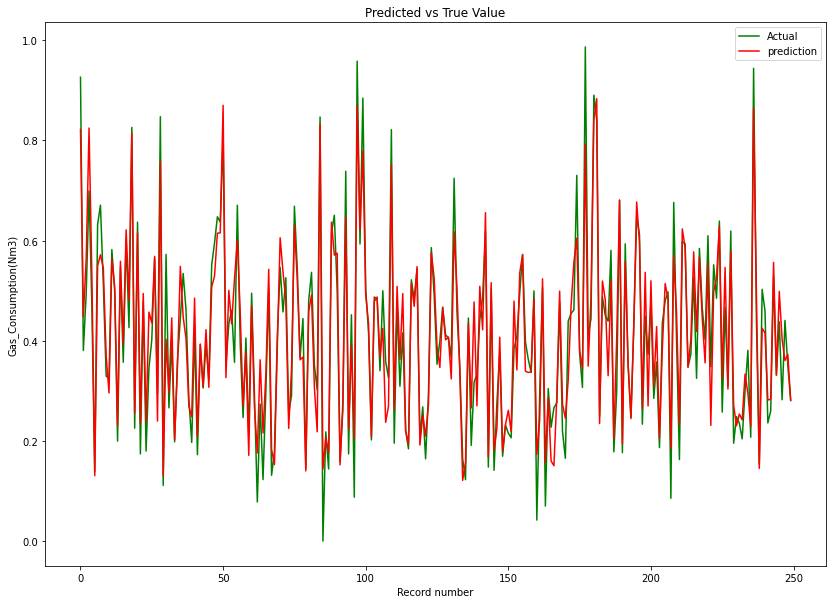

In [315]:
plt.figure(figsize=(14,10))
plt.plot(range(250),y_test[0:250], color = "green")
plt.plot(range(250),model.predict(X_test[0:250]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()